# Power Analysis

Author:  Thomas Haslwanter, July-2021

Retrospective analyses of published experiments have indicated that a stunning number of them have a very low power, somewhere between 15% and 30%. To investigate the practical consequences of such studies, this notebook replicates a test with a test-design with a power of about 25%.

The (expected, but nevertheless almost unbelievable) result: 75% of these investigations would have missed an existing effect; and those that found an effect reported an effect-size that is significantly larger than the actual effect size ("winner's curse").

## Set up the experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats import power

We simulate two (independent) groups:

    1) a *pre*-group, with an average IQ of 100
    2) a *post*-group, which has received a magic potion, and now has an average IQ of 105

In [2]:
# Data distributions
pre = 100
effect_size = 1/3 # The effect-size is 1/3 of the standard deviation
std = 15    
n_group = 30

In [3]:
true_effect = effect_size * std
post = pre + true_effect
nd_pre =  stats.norm(pre, std)
nd_post = stats.norm(post, std)

## Plot the theoretical curves
Show the distribution of the data, as well as the distribution of the expected mean values. After all, we want to see if the *mean*-value has changed.

In [6]:
# Distributions of means
dofs = n_group-1
sem = std/np.sqrt(n_group)
td_pre = stats.t(dofs, pre, sem)
td_post = stats.t(dofs, post, sem)

Text(0.5, 0, 'x')

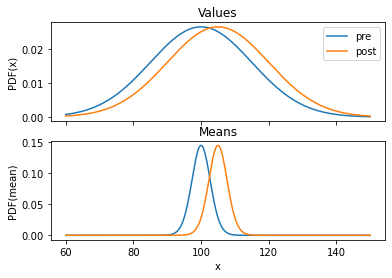

In [7]:
x = np.linspace(60, 150, 200)

fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(x, nd_pre.pdf(x), label='pre')
axs[0].plot(x, nd_post.pdf(x), label='post')
axs[0].set_title('Values')
axs[0].set_ylabel('PDF(x)')
axs[0].legend()

axs[1].plot(x, td_pre.pdf(x))
axs[1].plot(x, td_post.pdf(x))
axs[1].set_title('Means')
axs[1].set_ylabel('PDF(mean)')
axs[1].set_xlabel('x')

In [8]:
# Calculate the power of the test
test_power = power.tt_ind_solve_power(nobs1=n_group, alpha = 0.05, effect_size = effect_size)
print(f'The power of the test is {test_power:4.2f}')

The power of the test is 0.25


## Simulate 100 test-runs
Now if we would perform 100 studies with a power of 25%, what would we find?

In [9]:
n_tests = 100
diffs = []
ps = []
alpha = 0.05  # Commonly used threshold for significance

for test in range(n_tests):
    data_pre = nd_pre.rvs(n_group)
    data_post = nd_post.rvs(n_group)
    t, p = stats.ttest_ind(data_pre, data_post)
    
    diffs.append(np.mean(data_post) - np.mean(data_pre))
    ps.append(p)

In [10]:
ps = np.array(ps)
diffs = np.array(diffs)

significant = ps < alpha
n_significant = np.sum(significant)
print(f'Percentage of significant tests: {n_significant/n_tests * 100}%')

found_diff = np.mean(diffs[significant])
print(f'Mean significant difference= {found_diff:4.2f}, compared to a true effect of {true_effect}')

Percentage of significant tests: 22.0%
Mean significant difference= 9.94, compared to a true effect of 5.0
